In [19]:
import numpy as np
import gvar as gv
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = [10, 8]


#import warnings  
#warnings.simplefilter(action="default")

sys.path.append('../')
import fitter.data_loader as dl
import fitter.fit_manager as fm
import fitter.fitter as fit

In [20]:
from importlib import reload
reload(dl)
reload(fm)
reload(fit)

<module 'fitter.fitter' from '../fitter/fitter.py'>

In [33]:
prior = {}
prior['w0'] = gv.BufferDict()

# const
prior['w0']['wm0'] = gv.gvar('1(1)')

# lo
prior['w0']['A_l'] = gv.gvar('1(1)')
prior['w0']['A_s'] = gv.gvar('1(1)')
prior['w0']['A_a'] = gv.gvar('-0.5(2.0)')

# nlo
prior['w0']['A_aa'] = gv.gvar('0(1)')
prior['w0']['A_al'] = gv.gvar('0(1)')
prior['w0']['A_as'] = gv.gvar('0(1)')
prior['w0']['A_ll'] = gv.gvar('0(1)')
prior['w0']['A_ss'] = gv.gvar('0(1)')
prior['w0']['A_ls'] = gv.gvar('0(1)')

# n2lo
prior['w0']['A_aaa'] = gv.gvar('0(1)')
prior['w0']['A_aal'] = gv.gvar('0(1)')
prior['w0']['A_aas'] = gv.gvar('0(1)')
prior['w0']['A_all'] = gv.gvar('0(1)')
prior['w0']['A_als'] = gv.gvar('0(1)')
prior['w0']['A_ass'] = gv.gvar('0(1)')
prior['w0']['A_lll'] = gv.gvar('0(1)')
prior['w0']['A_lls'] = gv.gvar('0(1)')
prior['w0']['A_lss'] = gv.gvar('0(1)')
prior['w0']['A_sss'] = gv.gvar('0(1)')

# alpha_S term
prior['w0']['A_alpha'] = gv.gvar('0(0.7)')

# log terms
prior['w0']['A_ll_g'] = gv.gvar('0(1)')
prior['w0']['A_lll_g']  = gv.gvar('0(1)')
prior['w0']['A_lll_gg'] = gv.gvar('0(1)')
prior['w0']['A_lls_g'] = gv.gvar('0(1)')

model_info = {}
model_info['name'] = 'test'
model_info['order']  = 'n2lo'
model_info['latt_ct'] = 'nlo'
model_info['include_log'] = True
model_info['include_log2'] = True
model_info['include_fv'] = True
model_info['include_alphas'] = True
model_info['exclude'] = ['A_aaa',]
model_info['chiral_cutoff'] = 'Fpi'

In [34]:
data_loader = dl.data_loader('2020_11_28-test', use_charm_reweighting=False)
gv_data = data_loader.gv_data
model_info = data_loader.get_model_info_from_name('Fpi_n3lo_log_log2_fv')
prior = data_loader.get_prior(model_info=model_info, default=True)
phys_point_data = data_loader.phys_point_data

In [35]:
fit_manager = fm.fit_manager(
    phys_point_data=phys_point_data, 
    fit_data=gv_data, 
    model_info=model_info,
    prior=prior)

In [36]:
fit_manager.model_info

{'name': 'Fpi_n3lo_log_log2_fv',
 'chiral_cutoff': 'Fpi',
 'order': 'n3lo',
 'latt_ct': 'n3lo',
 'include_log': True,
 'include_log2': True,
 'include_fv': True,
 'include_alphas': False,
 'exclude': []}

In [31]:
print(fit_manager)

Model: Fpi_n3lo_log_log2_fv
w0: 0.1708(11)

w0/a06: 2.987(14)     => a06/fm: 0.05717(51)
w0/a09: 1.9446(67)    => a09/fm: 0.08781(70)
w0/a12: 1.4100(32)    => a12/fm: 0.12111(86)
w0/a15: 1.1452(12)    => a15/fm: 0.14912(97)

Parameters:
            wm0      1.076 (69)      [     1.0 (1.0) ]  
            A_l       1.23 (40)      [     1.0 (1.0) ]  
            A_s       1.39 (41)      [     1.0 (1.0) ]  
            A_a      -0.83 (28)      [    -0.5 (1.0) ]  
           A_aa       0.44 (56)      [     0.0 (1.0) ]  
           A_al      -1.14 (82)      [     0.0 (1.0) ]  *
           A_as       0.88 (79)      [     0.0 (1.0) ]  
           A_ll      -0.31 (95)      [     0.0 (1.0) ]  
           A_ls       0.46 (91)      [     0.0 (1.0) ]  
           A_ss      -0.80 (79)      [     0.0 (1.0) ]  
         A_ll_g       0.52 (85)      [     0.0 (1.0) ]  
          A_aaa       0.04 (95)      [     0.0 (1.0) ]  
          A_aal      -0.20 (98)      [     0.0 (1.0) ]  
          A_aas      

In [32]:
data_loader.save_fit_info(fit_manager.fit_info)

In [167]:
data_loader.save_results_summary(output_string='')

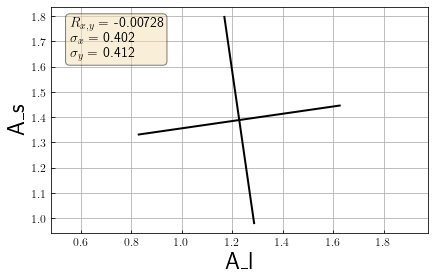

In [191]:
fit_manager.plot_error_ellipsis('A_l', 'A_s', 'w0')

In [ ]:
print(fit_manager.fit['w0'])

In [139]:
print(fit_manager)

Model: Fpi_n3lo_log_log2_fv
w0: 0.1708(11)

w0/a06: 2.987(14)     => a06/fm: 0.05717(51)
w0/a09: 1.9446(67)    => a09/fm: 0.08781(70)
w0/a12: 1.4100(32)    => a12/fm: 0.12111(86)
w0/a15: 1.1452(12)    => a15/fm: 0.14912(97)

Parameters:
            wm0      1.076 (69)      [     1.0 (1.0) ]  
            A_l       1.23 (40)      [     1.0 (1.0) ]  
            A_s       1.39 (41)      [     1.0 (1.0) ]  
            A_a      -0.83 (28)      [    -0.5 (1.0) ]  
           A_aa       0.44 (56)      [     0.0 (1.0) ]  
           A_al      -1.14 (82)      [     0.0 (1.0) ]  *
           A_as       0.88 (79)      [     0.0 (1.0) ]  
           A_ll      -0.31 (95)      [     0.0 (1.0) ]  
           A_ls       0.46 (91)      [     0.0 (1.0) ]  
           A_ss      -0.80 (79)      [     0.0 (1.0) ]  
         A_ll_g       0.52 (85)      [     0.0 (1.0) ]  
          A_aaa       0.04 (95)      [     0.0 (1.0) ]  
          A_aal      -0.20 (98)      [     0.0 (1.0) ]  
          A_aas      

In [128]:
def test(self):

    # converts a dictionary of dictionaries to a markdown table
    def dict_dict_to_table(dict_dict, column0='', exclude=[], sort_key=None):
        header = []
        for item in dict_dict:
            header = np.union1d(header, list(dict_dict[item]))

        header = sorted(header, key=sort_key)
        for key in exclude:
            if key in header:
                header.remove(key)
            

        table = '| %s |' %(column0)
        for key in header:
            table += ' %s |' %(key)
        table += '\n'

        table += '| --- |'
        for key in header:
            table += ' --- |'
        table += '\n'

        for item in dict_dict:
            table += '| %s |' %(item)
            for key in header:
                if key in dict_dict[item]:
                    table += ' %s |' %(str(dict_dict[item][key]))
                else:
                    table += '  |'
            table += '\n'

        return table

    filename = self.project_path +'/results/'+ self.collection['name'] + '/README.md'


    models = self.collection['models']
    filepath = self.project_path +'/results/'+ self.collection['name'] +'/pickles/'
    observables = [file.split('.')[0].split('_')[0] for file in os.listdir(filepath)]

    prior_table = ''
    for obs in observables:
        prior_table += 'observable: %s \n' %(obs)
        priors_models = {mdl : self.get_prior(model=mdl)[obs] for mdl in models}
        priors_models[obs+'_interpolation'] = self.get_prior(model=models[0])[obs+'_interpolation']

        length = lambda x : len(x.split('_')[1]) if len(x.split('_')) > 1 else 0
        prior_table += dict_dict_to_table(priors_models, column0='model', sort_key=length)
        prior_table += '\n'

    return prior_table

print(test(data_loader))

) | 1.0(1.0) | 1.0(1.0) |  |  |  | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) |  |  |  |  |  |  |  | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.00(70) |
| Fpi_n3lo_alphas |  |  |  |  | 1.0(1.0) | -0.5(1.0) | 1.0(1.0) | 1.0(1.0) |  |  |  | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) |  |  |  |  |  |  |  | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.00(70) |
| Fpi_n3lo_alphas_fv |  |  |  |  | 1.0(1.0) | -0.5(1.0) | 1.0(1.0) | 1.0(1.0) |  |  |  | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) |  |  |  |  |  |  |  | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.0(1.0) | 0.00(70) |
| Fpi_n3lo_fv |  |  |  |  | 1.0(1.

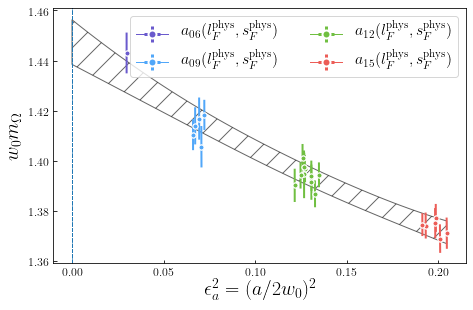

In [164]:
fit_manager.plot_fit('a')

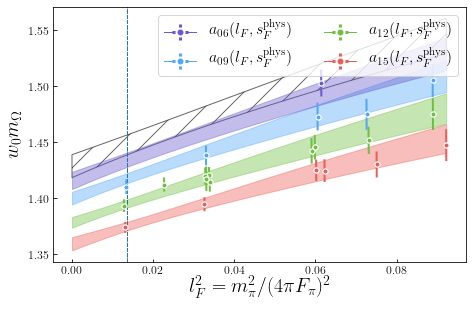

In [151]:
fit_manager.plot_fit('l')

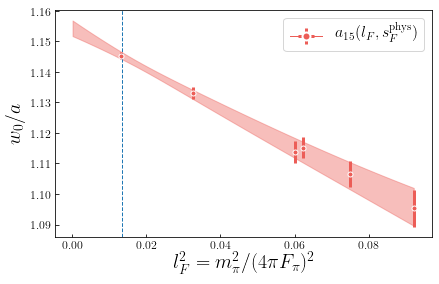

In [162]:
fit_manager.plot_interpolation('a15')

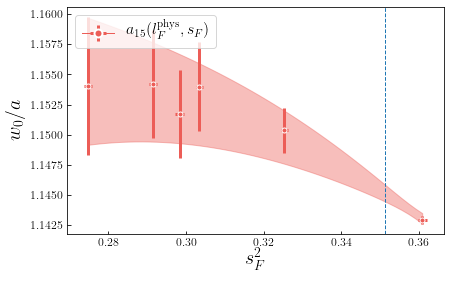

In [163]:
fit_manager.plot_interpolation('a15', param='s')